In [35]:
import pandas as pd

# 1. Data collection + basic quality assessment

df = pd.read_csv("financial_data_250.csv")
df.head()


,Company Name,Ticker,Country,Industry,Year,Revenue,Revenue Unit,Date,Year_Price,Open,High,Low,Close,Volume,Adj Close
0,American Airlines Group Inc.,AAL,United States,Industrials,NaN,5.429400e+10,USD,2022-01-03,2022,18.750000,18.750000,19.180000,18.200001,42781000.0,18.230000
1,American Airlines Group Inc.,AAL,United States,Industrials,NaN,5.429400e+10,USD,2022-01-04,2022,19.020000,19.020000,19.459999,18.850000,29266600.0,19.219999
2,American Airlines Group Inc.,AAL,United States,Industrials,NaN,5.429400e+10,USD,2022-01-05,2022,18.680000,18.680000,19.389999,18.510000,34447900.0,19.129999
3,American Airlines Group Inc.,AAL,United States,Industrials,NaN,5.429400e+10,USD,2022-01-06,2022,18.570000,18.570000,19.059999,18.350000,19097700.0,18.889999
4,American Airlines Group Inc.,AAL,United States,Industrials,NaN,5.429400e+10,USD,2022-01-07,2022,19.280001,19.280001,19.590000,18.580000,42399500.0,18.750000


In [36]:
df.info()
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178461 entries, 0 to 178460
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Company Name  178461 non-null  object 
 1   Ticker        178461 non-null  object 
 2   Country       178461 non-null  object 
 3   Industry      178461 non-null  object 
 4   Year          0 non-null       float64
 5   Revenue       178461 non-null  float64
 6   Revenue Unit  178461 non-null  object 
 7   Date          178461 non-null  object 
 8   Year_Price    178461 non-null  int64  
 9   Open          178461 non-null  float64
 10  High          178461 non-null  float64
 11  Low           178461 non-null  float64
 12  Close         178461 non-null  float64
 13  Volume        178461 non-null  float64
 14  Adj Close     178461 non-null  float64
dtypes: float64(8), int64(1), object(6)
memory usage: 20.4+ MB


9774

In [37]:
print(df.isnull().sum())


Company Name         0
Ticker               0
Country              0
Industry             0
Year            178461
Revenue              0
Revenue Unit         0
Date                 0
Year_Price           0
Open                 0
High                 0
Low                  0
Close                0
Volume               0
Adj Close            0
dtype: int64


In [38]:
# remove duplicate rows
df = df.drop_duplicates()

# fill missing Year using Year_Price and convert to integer
df['Year'] = df['Year'].fillna(df['Year_Price']).astype(int)

# convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# quick data quality check
print(df.isnull().sum())
print(df.info())


Company Name    0
Ticker          0
Country         0
Industry        0
Year            0
Revenue         0
Revenue Unit    0
Date            0
Year_Price      0
Open            0
High            0
Low             0
Close           0
Volume          0
Adj Close       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 168687 entries, 0 to 178459
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Company Name  168687 non-null  object        
 1   Ticker        168687 non-null  object        
 2   Country       168687 non-null  object        
 3   Industry      168687 non-null  object        
 4   Year          168687 non-null  int64         
 5   Revenue       168687 non-null  float64       
 6   Revenue Unit  168687 non-null  object        
 7   Date          168687 non-null  datetime64[ns]
 8   Year_Price    168687 non-null  int64         
 9   Open          168687 non-null  float64       

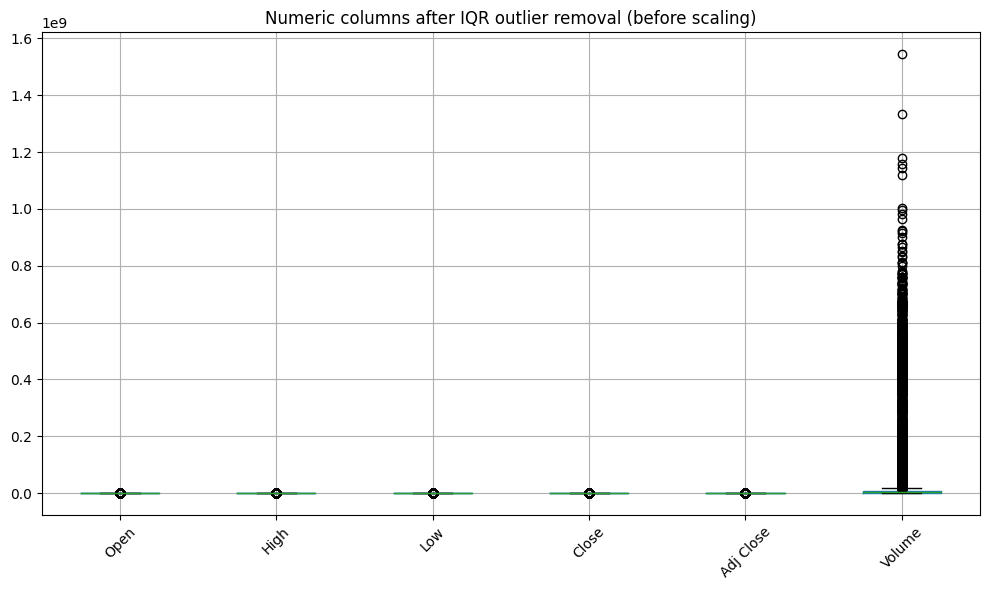

In [39]:
import matplotlib.pyplot as plt

# 3a. Distribution check (before Min-Max scaling)

plt.figure(figsize=(10, 6))
df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].boxplot()
plt.title('Numeric columns after IQR outlier removal (before scaling)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [40]:
# 2. Outlier handling with IQR

def handle_outliers_iqr(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return data[(data[column] >= lower) & (data[column] <= upper)]

numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

for col in numeric_columns:
    df = handle_outliers_iqr(df, col)

print(df[numeric_columns].describe())


                Open           High            Low          Close   
count  134343.000000  134343.000000  134343.000000  134343.000000  \
mean      106.498987     112.182629     113.425522     110.910929   
std        70.258660      72.915974      73.592611      72.182827   
min         2.880000       2.880000       3.010000       2.830000   
25%        51.178497      53.829092      54.470001      53.200001   
50%        87.480293      93.550003      94.650002      92.449997   
75%       149.293480     158.875000     160.619995     157.130005   
max       320.013000     323.989990     324.730011     312.220001   

           Adj Close        Volume  
count  134343.000000  1.343430e+05  
mean      112.178476  4.808902e+06  
std        72.888999  4.299679e+06  
min         2.900000  2.313000e+03  
25%        53.810001  1.627750e+06  
50%        93.500000  3.296200e+06  
75%       158.880005  6.662500e+06  
max       313.269989  1.945010e+07  


In [41]:
from sklearn.preprocessing import MinMaxScaler

# 3. Min-Max scaling
cols_to_scale = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df[cols_to_scale])
scaled_columns = [f"{c}_Scaled" for c in cols_to_scale]

df[scaled_columns] = scaled_values

print(df[scaled_columns].describe())


         Open_Scaled    High_Scaled     Low_Scaled   Close_Scaled   
count  134343.000000  134343.000000  134343.000000  134343.000000  \
mean        0.326737       0.340390       0.343204       0.349336   
std         0.221543       0.227075       0.228747       0.233307   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.152297       0.158666       0.159953       0.162804   
50%         0.266766       0.282364       0.284844       0.289667   
75%         0.461678       0.485799       0.489898       0.498723   
max         1.000000       1.000000       1.000000       1.000000   

       Adj Close_Scaled  Volume_Scaled  
count     134343.000000  134343.000000  
mean           0.352091       0.247154  
std            0.234846       0.221088  
min            0.000000       0.000000  
25%            0.164030       0.083580  
50%            0.291910       0.169371  
75%            0.502561       0.342465  
max            1.000000       1.000000  


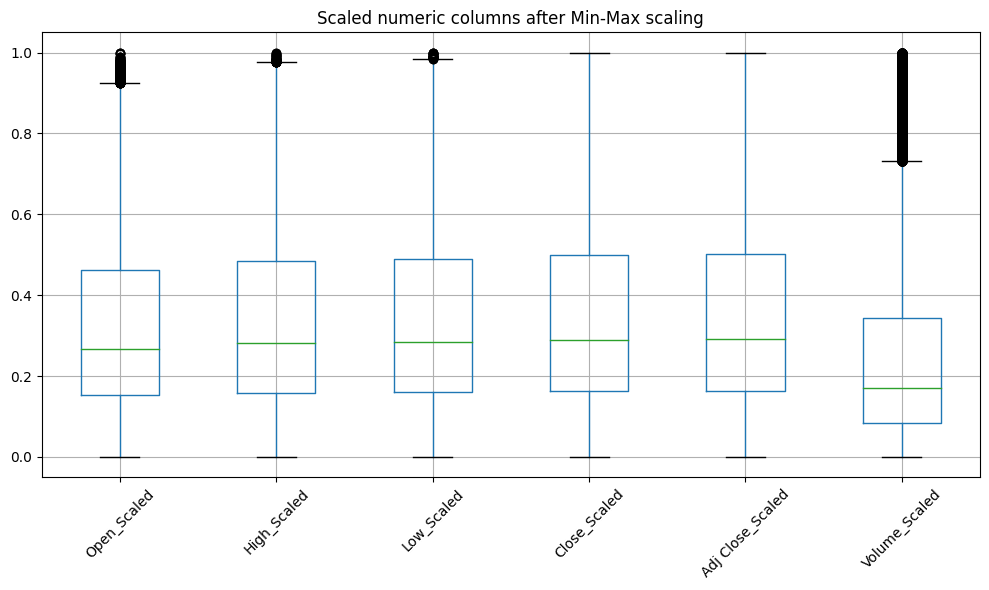

In [42]:
# 3b. Check distribution after Min-Max scaling

import matplotlib.pyplot as plt

scaled_columns = [
    'Open_Scaled',
    'High_Scaled',
    'Low_Scaled',
    'Close_Scaled',
    'Adj Close_Scaled',
    'Volume_Scaled',
]

plt.figure(figsize=(10, 6))
df[scaled_columns].boxplot()
plt.title('Scaled numeric columns after Min-Max scaling')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [43]:
# 4. Feature engineering: lag and moving averages

df = df.sort_values(['Ticker', 'Date'])

df['Lag_1_Close_Scaled'] = df.groupby('Ticker')['Close_Scaled'].shift(1)
df['SMA_10'] = (
    df.groupby('Ticker')['Close_Scaled']
    .rolling(window=10)
    .mean()
    .reset_index(level=0, drop=True)
)
df['SMA_30'] = (
    df.groupby('Ticker')['Close_Scaled']
    .rolling(window=30)
    .mean()
    .reset_index(level=0, drop=True)
)

print(
    df[
        ['Ticker', 'Date', 'Close_Scaled', 'Lag_1_Close_Scaled', 'SMA_10', 'SMA_30']
    ].head()
)


    Ticker       Date  Close_Scaled  Lag_1_Close_Scaled  SMA_10  SMA_30
3      AAL 2022-01-06      0.050163                 NaN     NaN     NaN
154    AAL 2022-08-15      0.040144            0.050163     NaN     NaN
157    AAL 2022-08-18      0.038463            0.040144     NaN     NaN
161    AAL 2022-08-24      0.035360            0.038463     NaN     NaN
226    AAL 2022-11-25      0.037235            0.035360     NaN     NaN


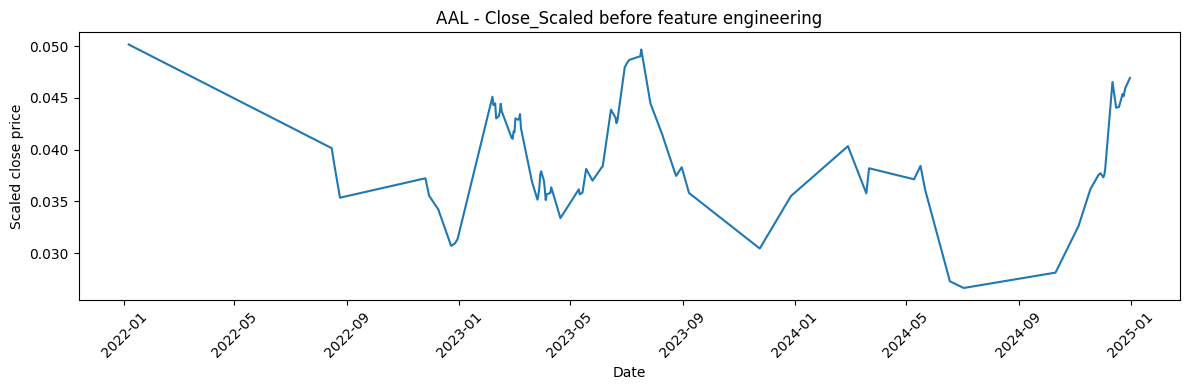

In [44]:
# 4a. Visual check before feature engineering (Close_Scaled over time for one ticker)

import matplotlib.pyplot as plt

sample_ticker = df['Ticker'].iloc[0]
df_sample = df[df['Ticker'] == sample_ticker].copy()

plt.figure(figsize=(12, 4))
plt.plot(df_sample['Date'], df_sample['Close_Scaled'], label='Close_Scaled')
plt.title(f'{sample_ticker} - Close_Scaled before feature engineering')
plt.xlabel('Date')
plt.ylabel('Scaled close price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose

# 5. Time series decomposition for a single ticker
ticker = df['Ticker'].iloc[0]
df_ticker = df[df['Ticker'] == ticker].copy()
df_ticker.set_index('Date', inplace=True)

# use the scaled closing price as the series
ts = df_ticker['Close_Scaled'].dropna()

# additive decomposition with a monthly-like period
decomposition = seasonal_decompose(ts, model='additive', period=20)

# add components back to the DataFrame
df_ticker['Trend'] = decomposition.trend
df_ticker['Seasonality'] = decomposition.seasonal
df_ticker['Residual'] = decomposition.resid

# drop edge NaNs so the preview is not empty
df_decomp = df_ticker.dropna(subset=['Trend', 'Seasonality', 'Residual'])

print(df_decomp[['Close_Scaled', 'Trend', 'Seasonality', 'Residual']].head())


            Close_Scaled     Trend  Seasonality  Residual
Date                                                     
2023-02-06      0.045121  0.039704     0.001460  0.003957
2023-02-07      0.044313  0.039533     0.003294  0.001487
2023-02-09      0.044475  0.039685     0.002981  0.001808
2023-02-10      0.043020  0.039988     0.000166  0.002866
2023-02-13      0.043246  0.040320    -0.000173  0.003099


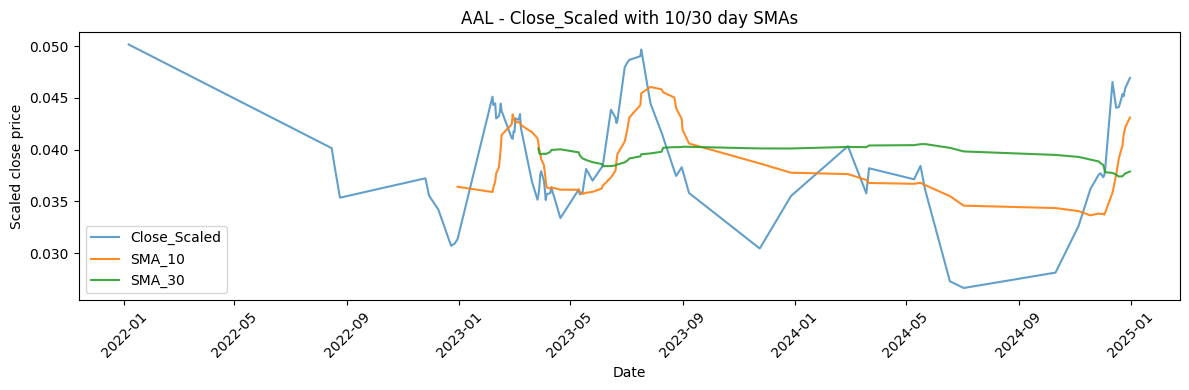

In [46]:
# 4b. Visual check after feature engineering (SMAs vs Close_Scaled)

import matplotlib.pyplot as plt

sample_ticker = df['Ticker'].iloc[0]
df_sample = df[df['Ticker'] == sample_ticker].copy()

plt.figure(figsize=(12, 4))
plt.plot(df_sample['Date'], df_sample['Close_Scaled'], label='Close_Scaled', alpha=0.7)
plt.plot(df_sample['Date'], df_sample['SMA_10'], label='SMA_10', alpha=0.9)
plt.plot(df_sample['Date'], df_sample['SMA_30'], label='SMA_30', alpha=0.9)
plt.title(f'{sample_ticker} - Close_Scaled with 10/30 day SMAs')
plt.xlabel('Date')
plt.ylabel('Scaled close price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [47]:
from statsmodels.tsa.stattools import adfuller

# 6. Stationarity check and differencing
print("--- ADF test on original series ---")
adf_original = adfuller(ts, autolag='AIC')
print(f"ADF statistic: {adf_original[0]:.4f}")
print(f"P-value: {adf_original[1]:.4f}")

# First-order differencing per ticker
df['Close_Scaled_Diff'] = df.groupby('Ticker')['Close_Scaled'].diff()

ts_diff = df_ticker['Close_Scaled'].diff().dropna()
print("\n--- ADF test on differenced series ---")
adf_diff = adfuller(ts_diff, autolag='AIC')
print(f"ADF statistic: {adf_diff[0]:.4f}")
print(f"P-value: {adf_diff[1]:.4f}")

# Final preprocessed dataset
df_final = df.dropna(
    subset=[
        'Close_Scaled',
        'Close_Scaled_Diff',
        'Lag_1_Close_Scaled',
        'SMA_10',
        'SMA_30',
    ]
)

df_final.to_csv('preprocessed_financial_data_250.csv', index=False)
print(df_final[['Ticker', 'Date', 'Close_Scaled', 'Close_Scaled_Diff']].head())


--- ADF test on original series ---
ADF statistic: -3.1932
P-value: 0.0204

--- ADF test on differenced series ---
ADF statistic: -9.4461
P-value: 0.0000
    Ticker       Date  Close_Scaled  Close_Scaled_Diff
309    AAL 2023-03-28      0.035618           0.000453
310    AAL 2023-03-29      0.036297           0.000679
311    AAL 2023-03-30      0.037590           0.001293
312    AAL 2023-03-31      0.037913           0.000323
313    AAL 2023-04-03      0.037008          -0.000905
